1. Вычислить интегралы:
$$
\int_{1}^{\infty}{e^{-x}}{sin^5(x)} dx
$$
$$
\int_{}\int_{|x|+|y|<1}\frac{x^3 + 3xy}{e^{-y}}dxdy
$$

Для первого интеграла воспользуемся распределением $Pareto(\alpha, x_m)$

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
from scipy import integrate
import numpy as np
from tqdm import trange
%matplotlib inline

def MCM(alpha_t, beta, M):
    while True:
        alpha_t = (alpha_t * beta) % M
        yield alpha_t / M

mcm_gen = MCM(79507, 79507, 2**31)

ALPHA = 3
X_M = 2
N = 1000

In [2]:
def pareto(gen, alpha, x_m):
    while True:
        yield stats.pareto.ppf(next(gen), b=alpha, scale=x_m)

pareto_gen = pareto(mcm_gen, ALPHA, X_M)
pareto_vals = [next(pareto_gen) for _ in range(N)]

sample_mean = np.mean(pareto_vals)
sample_var = np.var(pareto_vals) * N / (N - 1)
print('Sample mean:', sample_mean)
print('Sample variance:', sample_var)

print('Expected mean:', ALPHA * X_M / (ALPHA - 1))
print('Expected variance:', ((X_M / (ALPHA - 1))**2) * ALPHA / (ALPHA - 2))

Sample mean: 3.0005102467034286
Sample variance: 2.999664574711214
Expected mean: 3.0
Expected variance: 3.0


Вычисление интеграла

100%|██████████| 100/100 [00:49<00:00,  2.03it/s]


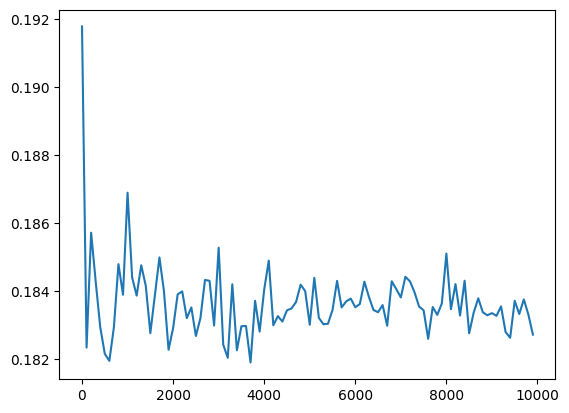

In [7]:
def f1(x):
    return np.exp(-x) * ((np.sin(x))**5)

def int1_monte_carlo(n_iter):
    xs = [next(pareto_gen) for _ in range(n_iter)]
    return np.mean([f1(x) * x**(ALPHA + 1) / (ALPHA * X_M**ALPHA) for x in xs])

x_min, x_max = 2, np.inf
int1_from_library = integrate.quad(f1, x_min, x_max)[0]

MAX_N_ITER = 10000
STEP = 100
plt.plot(np.arange(1, MAX_N_ITER, STEP), [abs(int1_monte_carlo(n_iter) - int1_from_library) for n_iter in trange(1, MAX_N_ITER, STEP)])
plt.show()

In [8]:
print('Integral from library:', int1_from_library)
print('Integral from Monte-Carlo (10000 iterations):', int1_monte_carlo(MAX_N_ITER))

Integral from library: 0.1917793214156123
Integral from Monte-Carlo (10000 iterations): 0.008142542574410279


In [5]:
def uniform(gen, a, b):
    while True:
        yield stats.uniform.ppf(next(gen), loc=a, scale=b - a)

uniform_gen = uniform(mcm_gen, 0, 1)
uniform_vals = [next(uniform_gen) for _ in range(N)]

sample_mean = np.mean(uniform_vals)
sample_var = np.var(uniform_vals) * N / (N - 1)
print('Sample mean:', sample_mean)
print('Sample variance:', sample_var)

print('Expected mean:', 0.5)
print('Expected variance:', 1 / 12)

Sample mean: 0.4943051925078034
Sample variance: 0.07895108381798291
Expected mean: 0.5
Expected variance: 0.08333333333333333


Вычислим второй интеграл с помощью распределений $U[-1, 1], U[-1, 1]$

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [04:07<00:00,  2.47s/it]


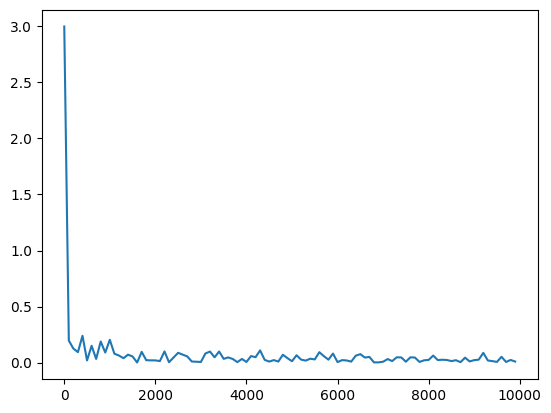

In [6]:
x_min, x_max = -1, 1
y_min, y_max = -1, 1

x_gen = uniform(mcm_gen, -1, 1)
y_gen = uniform(mcm_gen, -1, 1)

def f2(x, y):
    return (x + 4) / (x**2 + y**4 + 1)

def int2_monte_carlo(n_iter):
    xs = [next(x_gen) for _ in range(n_iter)]
    ys = [next(y_gen) for _ in range(n_iter)]
    return 4 * np.mean([f2(x, y) for x, y in zip(xs, ys)])

int2_from_library = integrate.nquad(f2, [[x_min, x_max], [y_min, y_max]])[0]

plt.plot(np.arange(1, MAX_N_ITER, STEP), [abs(int2_monte_carlo(n_iter) - int2_from_library) for n_iter in trange(1, MAX_N_ITER, STEP)])
plt.show()

In [7]:
print('Integral from library:', int2_from_library)
print('Integral from Monte-Carlo (10000 iterations):', int2_monte_carlo(MAX_N_ITER))

Integral from library: 11.12557599997076
Integral from Monte-Carlo (10000 iterations): 11.089323367096561
